## YouTube Ranking 시각화

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data/유튜브랭킹_20230919.csv')
df.head(3)

,순위,채널명,카테고리,구독자수,조회수,비디오수
0,1,BLACKPINK,음악/댄스/가수,91300000,33206830000,567
1,2,BANGTANTV,음악/댄스/가수,76400000,21348920000,2330
2,3,HYBE LABELS,음악/댄스/가수,72700000,29979900000,1428


- 구독자수 Top 20 --> barh

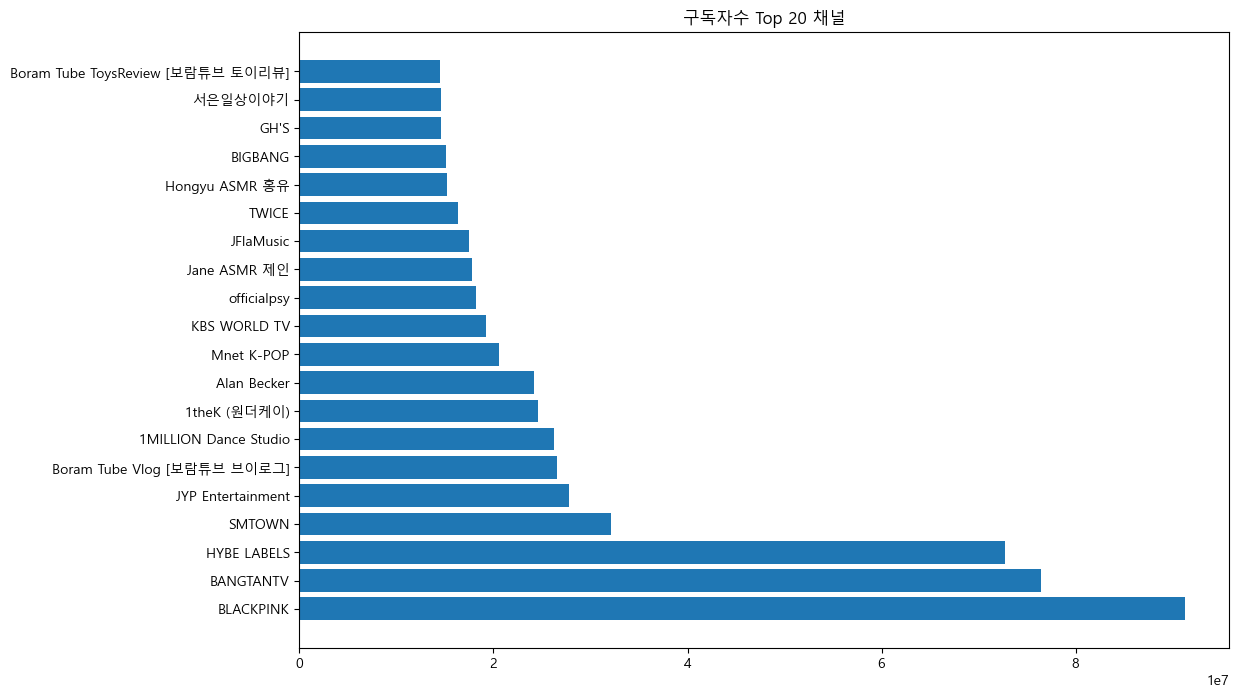

In [3]:
plt.figure(figsize=(12,8))
plt.barh(df.채널명.head(20), df.구독자수.head(20))
plt.title('구독자수 Top 20 채널')
plt.show()

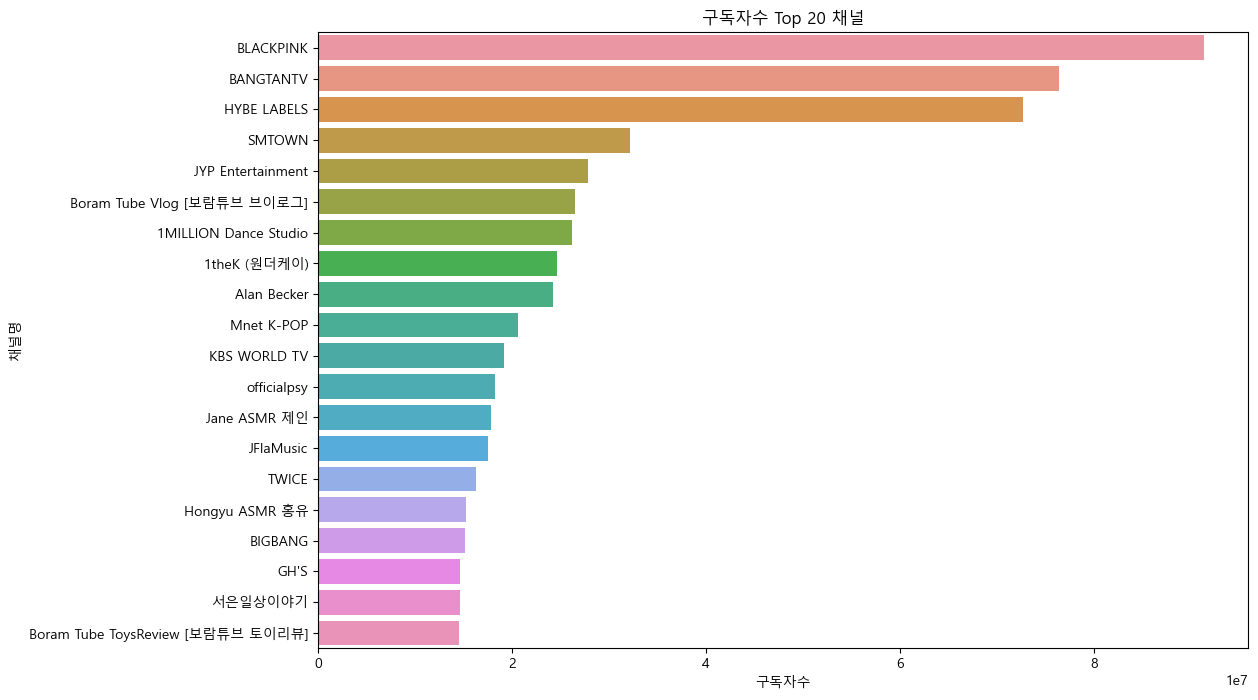

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='구독자수', data=df.head(20))
plt.title('구독자수 Top 20 채널')
plt.show()

- 조회수 Top 20 채널

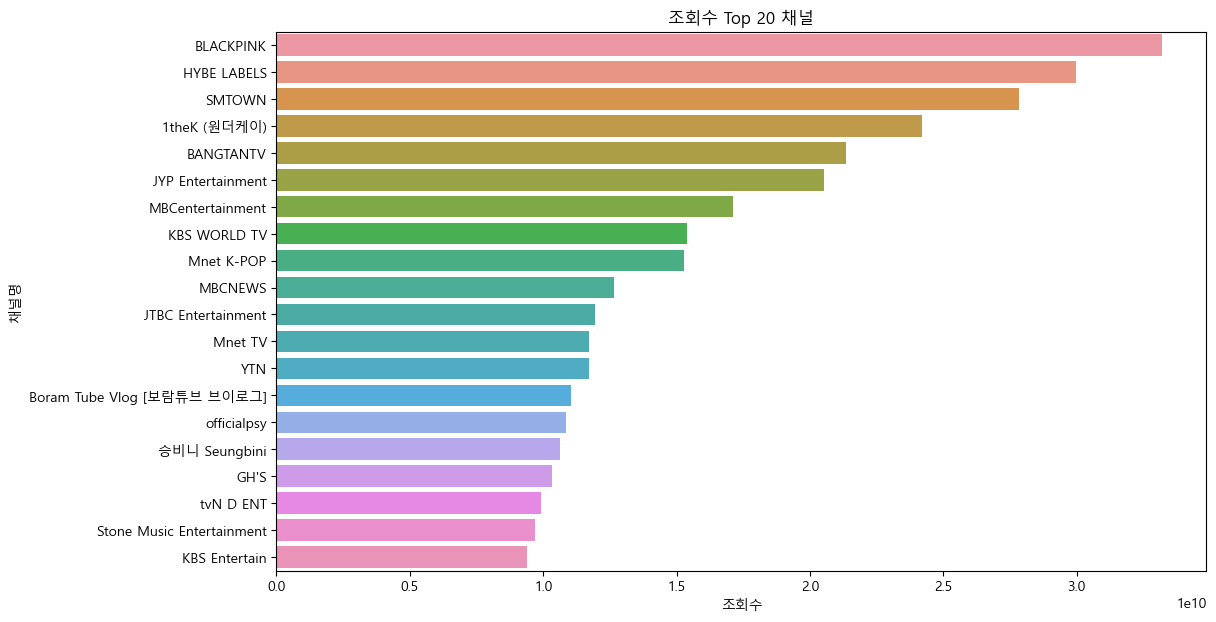

In [5]:
df_view = df.sort_values(by='조회수', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(y='채널명', x='조회수', data=df_view.head(20))
plt.title('조회수 Top 20 채널')
plt.show()

- 비디오수 Top 20 채널

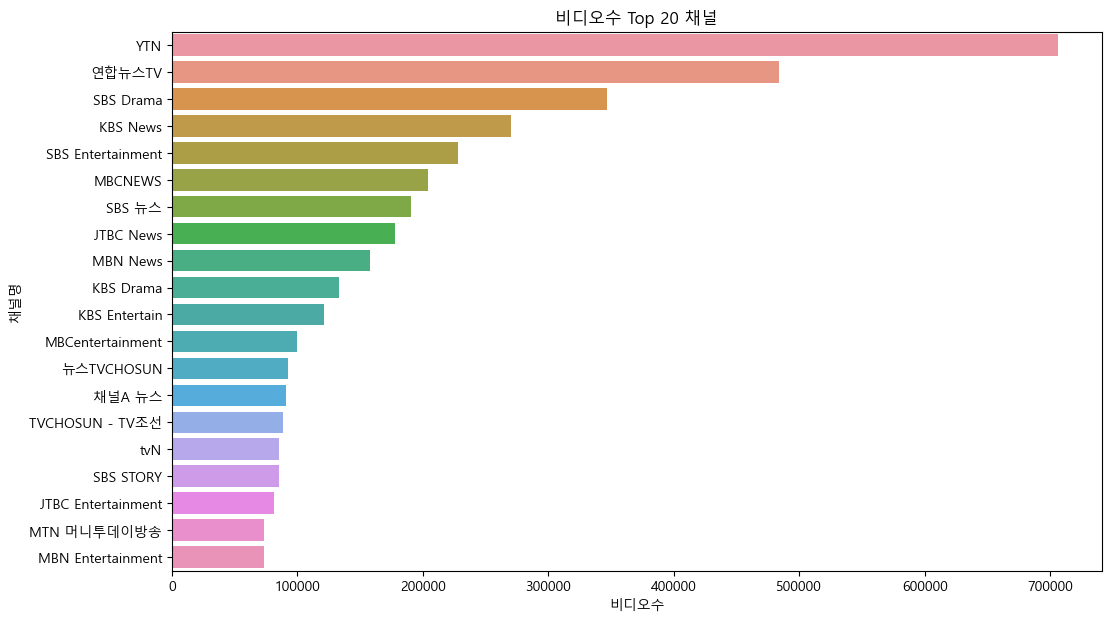

In [6]:
df_video = df.sort_values(by='비디오수', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(y='채널명', x='비디오수', data=df_video.head(20))
plt.title('비디오수 Top 20 채널')
plt.show()

- 카테고리별 채널수

In [9]:
df_cat = df.카테고리.value_counts().to_frame()
df_cat.head(10)

,카테고리
미분류,200
음악/댄스/가수,152
키즈/어린이,131
TV/방송,119
음식/요리/레시피,70
뉴스/정치/사회,58
BJ/인물/연예인,57
게임,51
영화/만화/애니,31
취미/라이프,29


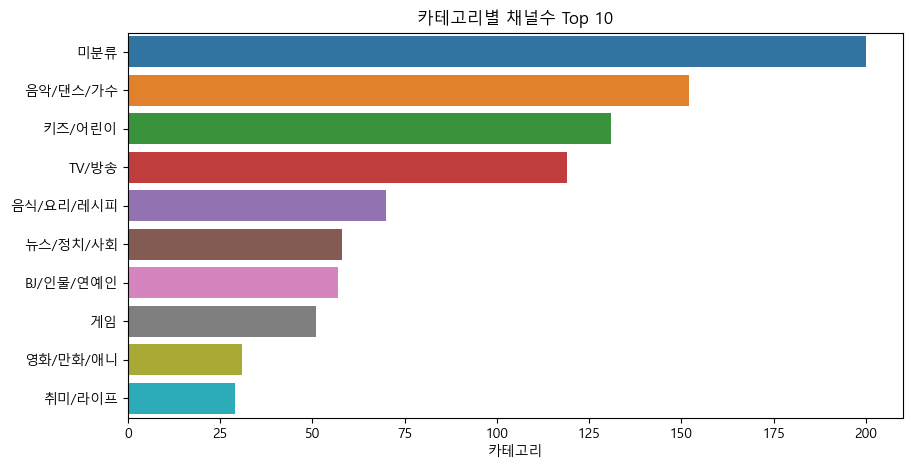

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_cat.head(10), y=df_cat.index[:10], x='카테고리')
plt.title('카테고리별 채널수 Top 10')
plt.show()

- 카테고리별 평균 구독자수

In [14]:
df.groupby('카테고리')[['구독자수']].mean().head()

,구독자수
카테고리,
BJ/인물/연예인,1.775965e+06
IT/기술/컴퓨터,1.477143e+06
TV/방송,2.295210e+06
게임,1.377059e+06
교육/강의,1.537778e+06


In [18]:
df_sub_mean = df.pivot_table('구독자수', '카테고리').sort_values('구독자수', ascending=False)
df_sub_mean.head()

,구독자수
카테고리,
음악/댄스/가수,5.528882e+06
회사/오피셜,3.541667e+06
음식/요리/레시피,3.142714e+06
키즈/어린이,3.130992e+06
해외,3.040000e+06


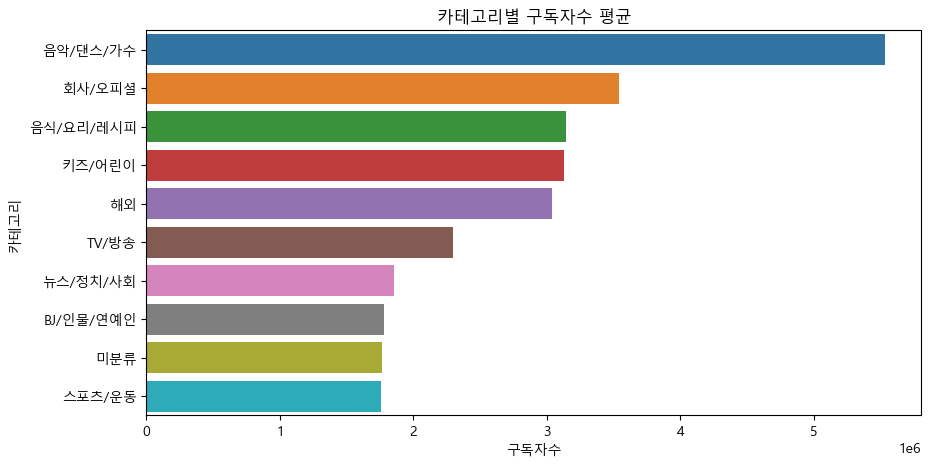

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sub_mean.head(10), y=df_sub_mean.index[:10], x='구독자수')
plt.title('카테고리별 구독자수 평균')
plt.show()